In [1]:
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
group_1 = [4.3, 3.9, 2.45, 4.4, 4.6, 3.7, 3.95, 4.75, 3.2, 4.25]
group_2 = [4.65, 4.2, 3.95, 4.35, 4.25, 4.9, 4.5, 4.25, 4.35, 4.7]
group_3 = [4.1, 4.4, 3.75, 3.95, 4.6, 4.05, 3.8, 3.85, 3.5, 4.35]

In [3]:
df = pd.DataFrame(columns = ['system', 'mean', 'variance'])
df.loc[0] = ['score-based', np.mean(group_1), np.std(group_1)]
df.loc[1] = ['content-based', np.mean(group_2), np.std(group_2)]
df.loc[2] = ['collaborative', np.mean(group_3), np.std(group_3)]
df

,system,mean,variance
0,score-based,3.950,0.659924
1,content-based,4.410,0.265330
2,collaborative,4.035,0.319414


In [4]:
stats.kruskal(group_1, group_2, group_3)

KruskalResult(statistic=4.947020754295921, pvalue=0.08428845479511471)

In [5]:
f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=2.6607311757206893, pvalue=0.08816217430267909)

In [7]:
df = pd.DataFrame({'score': [4.3, 3.9, 2.45, 4.4, 4.6, 3.7, 3.95, 4.75, 3.2, 4.25,
                             4.65, 4.2, 3.95, 4.35, 4.25, 4.9, 4.5, 4.25, 4.35, 4.7,
                             4.1, 4.4, 3.75, 3.95, 4.6, 4.05, 3.8, 3.85, 3.5, 4.35],
                   'group': np.repeat(['group_1', 'group_2', 'group_3'], repeats=10)}) 

In [8]:
tukey_result = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.1)

In [9]:
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.10 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_1 group_2     0.46 0.0952  0.0053 0.9147   True
group_1 group_3    0.085 0.9156 -0.3697 0.5397  False
group_2 group_3   -0.375 0.1996 -0.8297 0.0797  False
-----------------------------------------------------


Text(0.5, 0, 'score')

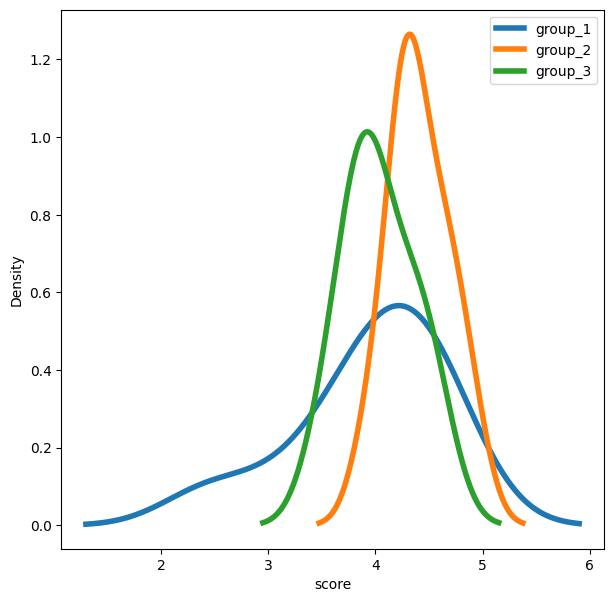

In [10]:
import matplotlib.pyplot as plt
  
data_wide = pd.DataFrame({'group_1': group_1, 'group_2': group_2, 'group_3': group_3})
data_wide.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
plt.xlabel("score")